In [260]:
# import the ML algorithm

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score,train_test_split,validation_curve,learning_curve
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import explained_variance_score
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import GridSearchCV

In [261]:
DATA_FILE = r'..\Data\rm_working_files\right_move_data_final2.csv'
df = pd.read_csv(DATA_FILE)

In [262]:
feature_cols = ['bedrooms','propertyType','bourough','outdoor space','nearest stattion','number of stops within 2kms',
                'population', 'median wage', 'total number of schools_y', 'percentage attedning private school']

In [263]:
X = pd.get_dummies(data=df[feature_cols], drop_first=True)
y = df.price

In [264]:
RFR1 = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100],
              'max_features': [7,8,9,10],
              'max_depth': [3,4,5,6],
              'min_samples_split':[100]
             }
scoring='r2'
grid_RFR = GridSearchCV(estimator=RFR1, param_grid=param_grid, scoring=scoring, n_jobs=1, cv=5,verbose=1)
grid_RFR.fit(X_train,y_train)
print('Random Forest regression...')
print('Best Params:')
print(grid_RFR.best_params_)  

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest regression...
Best Params:
{'max_depth': 6, 'max_features': 10, 'min_samples_split': 100, 'n_estimators': 100}


In [331]:
# Set best parameters given by GridsearchCV:

RFR_tuned=RandomForestRegressor(n_estimators=150,max_depth= 6, max_features=10, min_samples_split=200,random_state=42)

In [332]:
# Fitting train dataset with best hyperparameters:
RFR_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features=10, min_samples_split=200,
                      n_estimators=150, random_state=42)

In [333]:
y_predrfr_tuned=RFR_tuned.predict(X_test)

In [334]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predrfr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predrfr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predrfr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predrfr_tuned))
print("Model Score for Training data: {}".format(RFR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predrfr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(RFR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(RFR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())

Mean squared error: 20654746762.81
Mean absolute Error: 116657.80
Root Mean square Error: 143717.59
Test Variance score: 0.52
Model Score for Training data: 0.5437978564359816
Model Score for Testing data: 0.5161774459157948
R2(Cross_Val_Score):  [0.7160414  0.69613077 0.73615706 0.69187278 0.68977757]
R2(mean of fold of cross_val_score):  0.705995914523206


model scores for training data and testing data are almost same and mean CV score is also good. There is no overfitting seen here.
RMSE is much lower than the regession model too

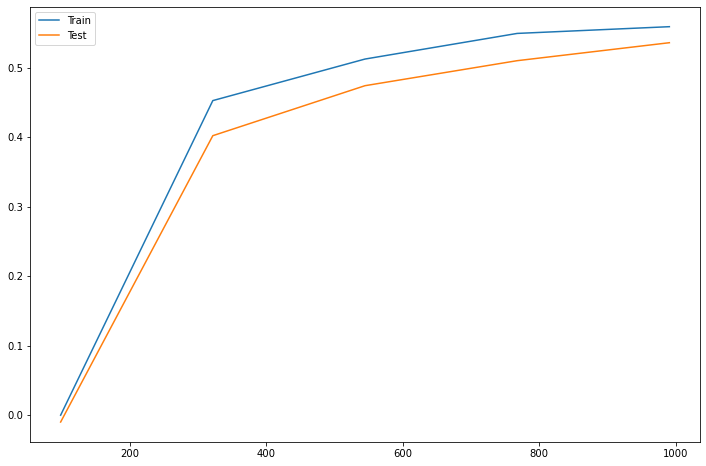

In [303]:
RFR_tuned=RandomForestRegressor(n_estimators=100,max_depth= 6, max_features=8, min_samples_split=100,random_state=42)
lc=learning_curve(RFR_tuned,X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

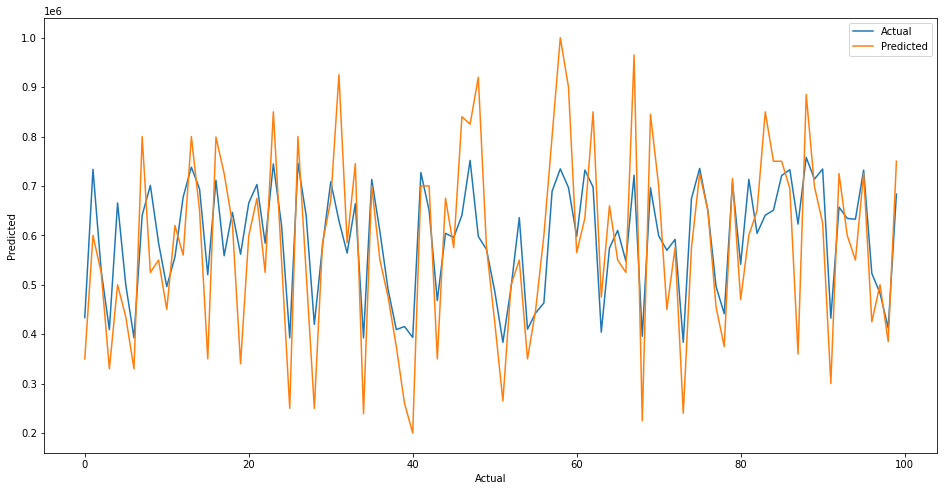

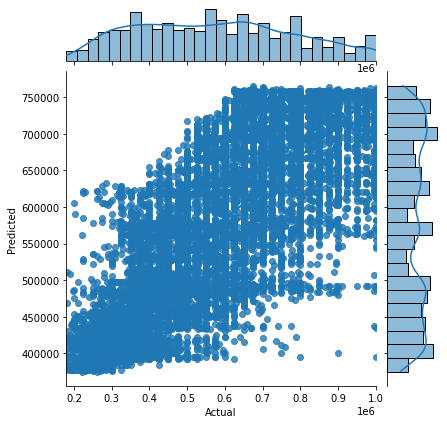

In [304]:
test = pd.DataFrame({'Predicted':y_predrfr_tuned,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

GRADIENT BOOSTING

In [305]:
# Lets see the best parameters from ensemble method using GridSearch:
gbr=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[100,500],
    'max_depth':range(4,10,1),
    'max_features':[6,7,9,10],
    'min_samples_split':[100,200]  
}
scoring='r2'
grid_gbr=GridSearchCV(gbr,param_grid,scoring=scoring,n_jobs=2,cv=3,verbose=1)
grid_gbr.fit(X_train,y_train)
print(grid_gbr.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
{'max_depth': 9, 'max_features': 6, 'min_samples_split': 200, 'n_estimators': 100}


In [317]:
GBR_tuned=GradientBoostingRegressor(n_estimators=100,max_depth= 9,max_features=6, min_samples_split=200,learning_rate=0.1,subsample=0.75,random_state=42)


In [318]:
GBR_tuned.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=9, max_features=6, min_samples_split=200,
                          random_state=42, subsample=0.75)

In [319]:
y_predgbr_tuned=GBR_tuned.predict(X_test)

In [320]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predgbr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predgbr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predgbr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predgbr_tuned))
print("Model Score for Training data: {}".format(GBR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predgbr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(GBR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(GBR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())

Mean squared error: 14430138115.52
Mean absolute Error: 93870.27
Root Mean square Error: 120125.51
Test Variance score: 0.66
Model Score for Training data: 0.7570804963157135
Model Score for Testing data: 0.6619844165113791
R2(Cross_Val_Score):  [0.84155116 0.82781956 0.84517842 0.82243105 0.81828308]
R2(mean of fold of cross_val_score):  0.8310526539078877


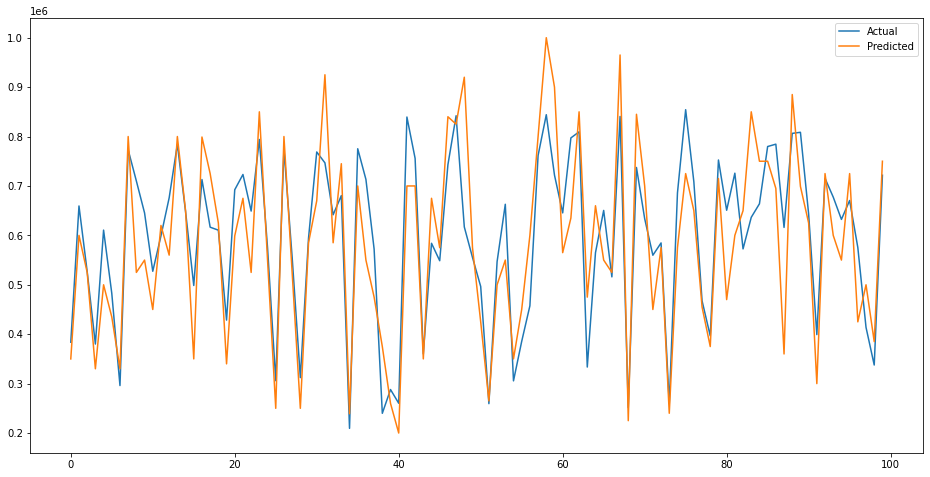

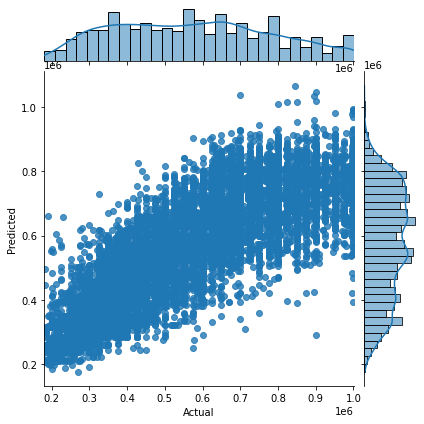

In [321]:
test = pd.DataFrame({'Predicted':y_predgbr_tuned,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [322]:
importances=list(GBR_tuned.feature_importances_)

In [323]:
importances

[0.2181008569286213,
 0.012550355277472749,
 0.03365457217210159,
 0.12011515671168486,
 0.07106219547931825,
 0.15961782653233578,
 0.06569488146231077,
 0.05321769197127198,
 0.005159735625858874,
 0.0006488600319944817,
 0.0,
 0.03648369026997787,
 0.0035171608591913974,
 0.005445055512090914,
 5.722992017726681e-05,
 0.005341994209826221,
 0.00459573153287116,
 0.02239124737914456,
 0.008149335802422388,
 0.007553605376963779,
 0.0017880693481732047,
 0.010451222698484247,
 0.002360699515621649,
 0.00027421423442283,
 0.00045250723555382205,
 0.011841445719515025,
 0.0010299820108286793,
 0.002125261459078235,
 1.281651801808013e-05,
 0.0071950800800039795,
 0.003070912712038206,
 0.003304763452787993,
 0.00490290889975102,
 0.018102280625550294,
 0.0014920864672058835,
 0.00537630202192327,
 0.015721451649118107,
 0.018170899567774876,
 0.0010900524227113128,
 0.009291746123793935,
 0.004849392602943863,
 0.0021596287136319923,
 0.005603556059313825,
 0.003395632886778802,
 0.0109

In [324]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]
feature_importances

[('bedrooms', 0.22),
 ('outdoor space', 0.01),
 ('nearest stattion', 0.03),
 ('number of stops within 2kms', 0.12),
 ('population', 0.07),
 ('median wage', 0.16),
 ('total number of schools_y', 0.07),
 ('percentage attedning private school', 0.05),
 ('propertyType_bungalow', 0.01),
 ('propertyType_cottage', 0.0),
 ('propertyType_country house', 0.0),
 ('propertyType_detached house', 0.04),
 ('propertyType_end of terrace house', 0.0),
 ('propertyType_maisonette', 0.01),
 ('propertyType_mews house', 0.0),
 ('propertyType_penthouse', 0.01),
 ('propertyType_retirement property', 0.0),
 ('propertyType_semi-detached house', 0.02),
 ('propertyType_studio apartment', 0.01),
 ('propertyType_terraced house', 0.01),
 ('bourough_bexley', 0.0),
 ('bourough_brent', 0.01),
 ('bourough_bromley', 0.0),
 ('bourough_camden', 0.0),
 ('bourough_city of london', 0.0),
 ('bourough_croydon', 0.01),
 ('bourough_ealing', 0.0),
 ('bourough_enfield', 0.0),
 ('bourough_greenwich', 0.0),
 ('bourough_hackney', 0.01)

In [325]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('bedrooms', 0.22),
 ('median wage', 0.16),
 ('number of stops within 2kms', 0.12),
 ('population', 0.07),
 ('total number of schools_y', 0.07),
 ('percentage attedning private school', 0.05),
 ('propertyType_detached house', 0.04),
 ('nearest stattion', 0.03),
 ('propertyType_semi-detached house', 0.02),
 ('bourough_havering', 0.02),
 ('bourough_islington', 0.02),
 ('bourough_lambeth', 0.02),
 ('outdoor space', 0.01),
 ('propertyType_bungalow', 0.01),
 ('propertyType_maisonette', 0.01),
 ('propertyType_penthouse', 0.01),
 ('propertyType_studio apartment', 0.01),
 ('propertyType_terraced house', 0.01),
 ('bourough_brent', 0.01),
 ('bourough_croydon', 0.01),
 ('bourough_hackney', 0.01),
 ('bourough_hounslow', 0.01),
 ('bourough_merton', 0.01),
 ('bourough_richmond upon thames', 0.01),
 ('bourough_sutton', 0.01),
 ('bourough_tower hamlets', 0.01),
 ('propertyType_cottage', 0.0),
 ('propertyType_country house', 0.0),
 ('propertyType_end of terrace house', 0.0),
 ('propertyType_mews house

In [326]:
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

In [316]:
df_feature_importance

,feature,importance
0,bedrooms,0.21
1,median wage,0.19
2,number of stops within 2kms,0.12
3,total number of schools_y,0.07
4,population,0.05
5,percentage attedning private school,0.05
6,nearest stattion,0.04
7,propertyType_detached house,0.04
8,propertyType_semi-detached house,0.02
9,bourough_croydon,0.02
